In [13]:
import pandas as pd
import missingno

### Exercice 1: Chargement de donnees

In [ ]:
titanic_data = pd.read_csv('../source/titanic.csv')
titanic_data.head()

### Exercice 2 - Exploration des donnees

In [ ]:
n_passengers = len(titanic_data.PassengerId)
n_passengers

In [ ]:
len(titanic_data[titanic_data.Survived == 1])

### Exercice 3 - Analyse des ages

In [ ]:
avg_age = titanic_data.Age.mean()
avg_age.item()

In [ ]:
most_frequent_age = titanic_data.Age.value_counts().max().item()
most_frequent_age

### Exercice 4 - Filtrage des donnees

In [ ]:
survived_df = titanic_data[titanic_data.Survived == 1]
survived_df.head()

In [ ]:
non_survived_df = titanic_data[titanic_data.Survived == 0]
non_survived_df.head()

### Exercice 5 - Statistiques des tarifs

In [ ]:
fare = titanic_data.Fare.describe()
fare

### Exercice 6 - Traitement des valeurs manquantes

In [8]:
sales_df = pd.read_csv('../source/sales_data.csv')
sales_df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [10]:
import missingno

In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [9]:
missing_values = sales_df.isna().sum()
missing_values

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [14]:
sales_df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


<Axes: >

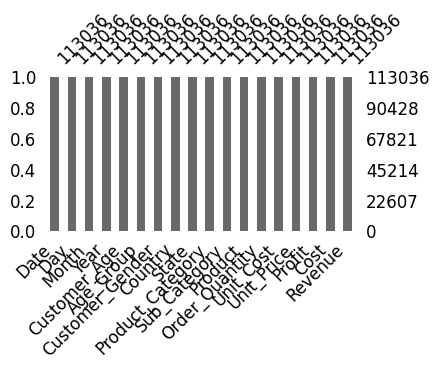

In [12]:
missingno.bar(sales_df, figsize=(4,2), fontsize=12, sort="ascending")

### Exercice 7 - Suppression des doublons

In [2]:
temp_df = pd.read_csv('../source/GlobalLandTemperaturesByCity.csv')
temp_df.head()
temp_df.shape

(8599212, 7)

In [3]:
temp_df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
duplicate_df = temp_df.drop_duplicates(['AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'])
duplicate_df.shape

(8237609, 7)

In [5]:
temp_df.shape == duplicate_df.shape

False

In [7]:
temp_df.AverageTemperature.describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

### Exercice 8 - Remplacement des valeurs incorrects

In [8]:
temperature_df = pd.read_csv('../source/GlobalLandTemperaturesByCity.csv')
temperature_df.AverageTemperature = temperature_df.AverageTemperature.abs()
temperature_df.AverageTemperature.describe()

count    8.235082e+06
mean     1.767891e+01
std      8.628851e+00
min      0.000000e+00
25%      1.098800e+01
50%      1.891800e+01
75%      2.521900e+01
max      4.270400e+01
Name: AverageTemperature, dtype: float64

### Exercice 9 - Extraction des donnees

In [ ]:
emails_df = pd.read_csv('../source/email_jetable.csv')
emails_df.head()

In [ ]:
emails_df.columns = ['index', 'emails']
emails_df.set_index('index')

In [ ]:
emails_df['extension'] = emails_df.emails.apply(lambda x : x.split('.')[-1])
emails_df

In [ ]:
emails_df.extension.unique()

### Exercice 10 - Transformation de donnees

In [2]:
grades_df = pd.read_csv('../source/student_grades.csv')
grades_df.columns = ['ID','salle','note']
grades_df

,ID,salle,note
0,401767594,3,B-
1,678665086,4,A+
2,678665086,3,A+
3,553725811,2,C
4,678665086,1,B
5,886308195,1,A
6,103066521,2,C
7,103066521,3,C-
8,821568627,4,D
9,821568627,2,A+


In [7]:
letter = 'F E D C B A'
note_dec = letter.split(' ')
new_note_dec = []
for i, ch in enumerate(note_dec):
    new_note_dec.append(ch+'-')
    new_note_dec.append(ch)
    new_note_dec.append(ch+'+')

note_to_index_map = {note: index for index, note in enumerate(new_note_dec)}
note_to_index_map

{'F-': 0,
 'F': 1,
 'F+': 2,
 'E-': 3,
 'E': 4,
 'E+': 5,
 'D-': 6,
 'D': 7,
 'D+': 8,
 'C-': 9,
 'C': 10,
 'C+': 11,
 'B-': 12,
 'B': 13,
 'B+': 14,
 'A-': 15,
 'A': 16,
 'A+': 17}

In [16]:
grades_df['note_dec'] = grades_df['note'].map(note_to_index_map)
grades_df['note_dec'] = grades_df['note_dec']/18 * 20
grades_df['result'] = grades_df['note_dec'] >= 10
grades_df['result'] = grades_df['result'].apply(lambda x : "Réussite" if x is True else "Echec" )
grades_df

,ID,salle,note,note_dec,result
0,401767594,3,B-,13.333333,Réussite
1,678665086,4,A+,18.888889,Réussite
2,678665086,3,A+,18.888889,Réussite
3,553725811,2,C,11.111111,Réussite
4,678665086,1,B,14.444444,Réussite
5,886308195,1,A,17.777778,Réussite
6,103066521,2,C,11.111111,Réussite
7,103066521,3,C-,10.000000,Réussite
8,821568627,4,D,7.777778,Echec
9,821568627,2,A+,18.888889,Réussite
